# 

## 4.1 Back to the Basics

In [5]:
foo = 'Monty'
bar = foo
foo = 'Python'
print (bar)

Monty


In [6]:
foo = ['Monty', 'Python']
bar = foo
foo[1] = 'Bodkin'
print (bar)

['Monty', 'Bodkin']


In [7]:
empty = []
nested = [empty, empty, empty]
print (nested)

nested[1].append('Python')
print (nested)

[[], [], []]
[['Python'], ['Python'], ['Python']]


In [9]:
nested = [[]] *3

print (id(nested[0]))
print(id(nested[1]))
print(id(nested[2]))

139754613079688
139754613079688
139754613079688


In [10]:
nested = [[]] * 3
nested[1].append('Python')
nested[1] = ['Monty']
print (nested)

[['Python'], ['Monty'], ['Python']]


### Equality

In [13]:
size = 5
python = ['Python']
snake_nest = [python] * size

print (snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] == snake_nest[4])

print (snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4])

True
True


In [15]:
import random
position = random.choice(range(size))
snake_nest[position] = ['Python']
print(snake_nest)
print (snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] == snake_nest[4])

print (snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4])

[['Python'], ['Python'], ['Python'], ['Python'], ['Python']]
True
False


### Conditionals

In [16]:
mixed = ['cat', '', ['dog'], []]

for element in mixed:
    if element:
        print (element)

cat
['dog']


In [18]:
animals = ['cat', 'dog']
# using if...elif
if 'cat' in animals:
    print (1)
elif 'dog' in animals:
    print (2)

1


In [19]:
sent = ['No', 'good', 'fish', 'goes', 'anywhere', 'without', 'a', 'porpoise', '.']

# functions all() and any() can be applied to a list (or other sequence) to check whether all or any items meet some condition
print ( all(len(w) > 4 for w in sent))
print ( any(len(w) > 4 for w in sent))

False
True


## 4.2 Sequences

In [20]:
#Tuples are formed with the comma operator
t = 'walk', 'fem', 3
print ( t)

#tuples can be indexed and sliced , and have a length
print ( t[0])

print ( t[1:])

print ( len(t))

('walk', 'fem', 3)
walk
('fem', 3)
3


In [21]:
# compare strings, lists, and tuples
raw = 'I turned off the spectroroute'
text = ['I', 'turned', 'off', 'the', 'spectroroute']
pair = (6, 'turned')

print ( raw[2], text[3], pair[1])

print ( raw[-3:], text[-3:], pair[-3:])

t the turned
ute ['off', 'the', 'spectroroute'] (6, 'turned')


### Operating on Sequence Types

In [22]:
import nltk

raw = 'Red lorry, yellow lorry, red lorry, yellow lorry.'
text = nltk.word_tokenize(raw)
fdist = nltk.FreqDist(text)

print ( list(fdist))

for key in fdist:
    print (fdist[key])

['Red', 'lorry', ',', 'yellow', 'red', '.']
1
4
3
2
1
1


In [23]:
# compare strings, lists, and tuples
words = ['I', 'turned', 'off', 'the', 'spectroroute']

words[2], words[3], words[4] = words[3], words[4], words[2]
print (words)

['I', 'turned', 'the', 'spectroroute', 'off']


In [24]:
tmp = words[2]
words[2] = words[3]
words[3] = words[4]
words[4] = tmp

In [25]:
words = ['I', 'turned', 'off', 'the', 'spectroroute']
tags = ['noun', 'verb', 'prep', 'det', 'noun']
zip(words, tags)

list(enumerate(words))

[(0, 'I'), (1, 'turned'), (2, 'off'), (3, 'the'), (4, 'spectroroute')]

In [26]:
text = nltk.corpus.nps_chat.words()
# we decide the location where we want to cut the data
cut = int(0.9 * len(text))
training_data, test_data = text[:cut], text[cut:] # cut the sequence at that location

# can verify that none of the original data is lost during this process, nor is it duplicated
print (text == training_data + test_data)

# that the ratio of the sizes of the two pieces is what we intended
print (len(training_data) / len(test_data))

True
9.0


### Combining Different Sequence Types

In [27]:
# string to list
words = 'I turned off the spectroroute'.split()
# use a list comprehension to build a list of tuples
wordlens = [(len(word), word) for word in words]

# to sort the list in place
print (wordlens.sort())
# join the words back into a single string
print (' '.join(w for (_, w) in wordlens))

None
I off the turned spectroroute


In [28]:
lexicon = [
            ('the', 'det', ['Di:', 'D@']),
            ('off', 'prep', ['Qf', 'O:f'])
            ]

print (lexicon.sort())

lexicon[1] = ('turned', 'VBD', ['t3:nd', 't3`nd'])
del lexicon[0]

None


In [29]:
#your turn
print( tuple(lexicon))

(('turned', 'VBD', ['t3:nd', 't3`nd']),)


### Generator Expressions

In [30]:
text = '''"When I use a word," Humpty Dumpty said in rather a scornful tone, 
        "it means just what I choose it to mean - neither more nor less."'''

print ([w.lower() for w in nltk.word_tokenize(text)])

['``', 'when', 'i', 'use', 'a', 'word', ',', "''", 'humpty', 'dumpty', 'said', 'in', 'rather', 'a', 'scornful', 'tone', ',', '``', 'it', 'means', 'just', 'what', 'i', 'choose', 'it', 'to', 'mean', '-', 'neither', 'more', 'nor', 'less', '.', "''"]


In [31]:
# by inserting the preceding expression inside a call to some other function
print (max([w.lower() for w in nltk.word_tokenize(text)]))
# Python allows us to omit the brackets
print (max(w.lower() for w in nltk.word_tokenize(text)))

word
word


## 4.3 Questions of Style

### Python Coding Style

In [34]:
import re
from nltk.corpus import brown
rotokas_words = nltk.corpus.toolbox.words('rotokas.dic') 
cv_word_pairs = [(cv, w) for w in rotokas_words
                 for cv in re.findall('[ptksvr][aeiou]', w)]

cfd = nltk.ConditionalFreqDist(
        (genre, word)
        for genre in brown.categories()
        for word in brown.words(categories=genre))

ha_words = ['aaahhhh', 'ah', 'ahah', 'ahahah', 'ahh', 'ahhahahaha', 'ahhh', 'ahhhh', 'ahhhhhh', 'ahhhhhhhhhhhhhh', 'ha',
            'haaa', 'hah', 'haha', 'hahaaa', 'hahah', 'hahaha']

In [35]:
syllables=['hello','my','name','is','john']
if (len(syllables) > 4 and len(syllables[2]) == 3 and syllables[2][2] in [aeiou] and syllables[2][3] == syllables[1][3]):
    process(syllables)

if len(syllables) > 4 and len(syllables[2]) == 3 and syllables[2][2] in [aeiou] and syllables[2][3] == syllables[1][3]:
    process(syllables)

### Procedural Versus Declarative Style

In [36]:
tokens = nltk.corpus.brown.words(categories='news')
count = 0
total = 0

for token in tokens:
    count += 1
    total += len(token)
    
print (total / count)

4.401545438271973


In [37]:
total = sum(len(t) for t in tokens)
print (total / len(tokens))

4.401545438271973


In [38]:
word_list = []
len_word_list = len(word_list)
i = 0

while i < len(tokens):
    j = 0
    while j < len_word_list and word_list[j] < tokens[i]:
        j += 1
        if j == 0 or tokens[i] != word_list[j]:
            word_list.insert(j, tokens[i])
            len_word_list += 1
    i += 1

In [39]:
word_list = sorted(set(tokens))
print(word_list)

['!', '$1', '$1,000', '$1,000,000,000', '$1,500', '$1,500,000', '$1,600', '$1,800', '$1.1', '$1.4', '$1.5', '$1.80', '$10', '$10,000', '$10,000-per-year', '$100', '$100,000', '$102,285,000', '$109', '$11.50', '$115,000', '$12', '$12,192,865', '$12,500', '$12.50', '$12.7', '$120', '$125', '$135', '$139.3', '$14', '$15', '$15,000', '$15,000,000', '$150', '$157,460', '$16', '$16,000', '$17', '$17,000', '$17.8', '$172,000', '$172,400', '$18', '$18.2', '$18.9', '$2', '$2,000', '$2,170', '$2,330,000', '$2,700', '$2.50', '$2.80', '$20', '$20,000', '$20,447,000', '$200,000', '$214', '$22', '$22.50', '$2400', '$25', '$25,000', '$25-a-plate', '$250', '$250,000', '$251', '$253,355,000', '$26,000,000', '$278,877,000', '$28', '$28,700,000', '$29,000', '$3', '$3,500', '$3,675', '$3.5', '$30', '$300', '$300,000,000', '$3100', '$32,000', '$325', '$344,000', '$37', '$37,500', '$39,000', '$39.5', '$4', '$4,177.37', '$4,500', '$4,700', '$4,800', '$40', '$40,000', '$40,000,000', '$400', '$43,000', '$45', 

In [40]:
fd = nltk.FreqDist(nltk.corpus.brown.words())
cumulative = 0.0
for rank, word in enumerate(fd):
    cumulative += fd[word] * 100 / fd.N()
    print ("%3d %6.2f%% %s" % (rank+1, cumulative, word))
        
    if cumulative > 25:
        break

  1   0.63% The
  2   0.63% Fulton
  3   0.63% County
  4   0.64% Grand
  5   0.64% Jury
  6   0.80% said
  7   0.81% Friday
  8   1.11% an
  9   1.12% investigation
 10   4.22% of
 11   4.22% Atlanta's
 12   4.24% recent
 13   4.25% primary
 14   4.25% election
 15   4.26% produced
 16   5.02% ``
 17   5.18% no
 18   5.19% evidence
 19   5.95% ''
 20   6.83% that
 21   6.94% any
 22   6.94% irregularities
 23   6.98% took
 24   7.03% place
 25  11.28% .
 26  11.28% jury
 27  11.30% further
 28  12.98% in
 29  12.98% term-end
 30  12.98% presentments
 31  18.38% the
 32  18.39% City
 33  18.39% Executive
 34  18.40% Committee
 35  23.42% ,
 36  23.73% which
 37  24.17% had
 38  24.17% over-all
 39  24.18% charge
 40  24.18% deserves
 41  24.18% praise
 42  26.59% and


In [41]:
text = nltk.corpus.gutenberg.words('milton-paradise.txt')
longest = ''

for word in text:
    if len(word) > len(longest):
        longest = word
print (longest)

unextinguishable


In [42]:
maxlen = max(len(word) for word in text)

print ([word for word in text if len(word) == maxlen])

['unextinguishable', 'transubstantiate', 'inextinguishable', 'incomprehensible']


### Some Legitimate Uses for Counters

In [43]:
sent = ['The', 'dog', 'gave', 'John', 'the', 'newspaper']
n = 3

print ([sent[i:i+n] for i in range(len(sent)-n+1)])

[['The', 'dog', 'gave'], ['dog', 'gave', 'John'], ['gave', 'John', 'the'], ['John', 'the', 'newspaper']]


In [44]:
m, n = 3, 7
array = [[set() for i in range(n)] for j in range(m)]
array[2][5].add('Alice')

print(array)

[[set(), set(), set(), set(), set(), set(), set()], [set(), set(), set(), set(), set(), set(), set()], [set(), set(), set(), set(), set(), {'Alice'}, set()]]


In [45]:
array = [[set()] * n] * m
array[2][5].add(7)
print(array)

[[{7}, {7}, {7}, {7}, {7}, {7}, {7}], [{7}, {7}, {7}, {7}, {7}, {7}, {7}], [{7}, {7}, {7}, {7}, {7}, {7}, {7}]]


## 4.4 Functions: The Foundation of Structured Programming

In [46]:
#Read text from a file

import re

def get_text(file):
    """Read text from a file, normalizing whitespace and stripping HTML markup."""
    text = open(file).read()
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'<.*?>', ' ', text)
    return text

### Function Inputs and Outputs

In [47]:
def repeat(msg, num):
    return ' '.join([msg] * num)

monty = 'Monty Python'
print (repeat(monty, 3))

Monty Python Monty Python Monty Python


In [48]:
def monty():
    return "Monty Python"

print (monty())

Monty Python


In [49]:
print (repeat(monty(), 3))

print (repeat('Monty Python', 3))

Monty Python Monty Python Monty Python
Monty Python Monty Python Monty Python


In [50]:
def my_sort1(mylist): # good: modifies its argument, no return value
    mylist.sort()
    
def my_sort2(mylist): # good: doesn't touch its argument, returns value
    return sorted(mylist)

def my_sort3(mylist): # bad: modifies its argument and also returns it
    mylist.sort()
    return mylist

### Parameter Passing

In [51]:
def set_up(word, properties):
    word = 'lolcat'
    properties.append('noun')
    properties = 5
    
w = ''
p = []

print (set_up(w, p))
print (w)
print (p)

None

['noun']


In [52]:
w = ''
word = w
word = 'lolcat'

print (w)

In [53]:
p = []
properties = p
#print (properties.append['noun'])

properties = 5
print (p)

[]


### Variable Scope

### Checking Parameter Types

In [54]:
def tag(word):
    if word in ['a', 'the', 'all']:
        return 'det'
    else:
        return 'noun'
    
print (tag('the'))

print (tag('knight'))

print (tag(["'Tis", 'but', 'a', 'scratch']))

det
noun
noun


In [55]:
def tag(word):
    assert isinstance(word, basestring), "argument to tag() must be a string"
    
    if word in ['a', 'the', 'all']:
        return 'det'
    else:
        return 'noun'

### Functional Decomposition

In [56]:
#Poorly designed function to compute frequent words.
import nltk

def freq_words(url, freqdist, n):
    from bs4 import BeautifulSoup

    # takes an HTML string and returns raw text
    text = BeautifulSoup(url).get_text()

    for word in nltk.word_tokenize(text):
        freqdist[word.lower()]+=1
        print (freqdist.keys())
        
constitution = "http://www.archives.gov/national-archives-experience/charters/constitution_transcript.html"
fd = nltk.FreqDist()
print (freq_words(constitution, fd, 20))

dict_keys(['http'])
dict_keys(['http', ':'])
dict_keys(['http', ':', '//www.archives.gov/national-archives-experience/charters/constitution_transcript.html'])
None


/home/prajwol/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:375: UserWarning: "http://www.archives.gov/national-archives-experience/charters/constitution_transcript.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [57]:
#Well-designed function to compute frequent words.

def freq_words(url):
    freqdist = nltk.FreqDist()    
    from bs4 import BeautifulSoup

    # takes an HTML string and returns raw text
    text = BeautifulSoup(url).get_text()
    for word in nltk.word_tokenize(text):
        freqdist[word.lower()]+=1
    return freqdist

fd = freq_words(constitution)
print (fd.keys())

dict_keys(['http', ':', '//www.archives.gov/national-archives-experience/charters/constitution_transcript.html'])


In [58]:
# we have now simplified the work of freq_words

from bs4 import BeautifulSoup
# takes an HTML string and returns raw text
words = nltk.word_tokenize(BeautifulSoup(constitution).get_text())

fd = nltk.FreqDist(word.lower() for word in words)
print (fd.keys())

dict_keys(['http', ':', '//www.archives.gov/national-archives-experience/charters/constitution_transcript.html'])


### Documenting Functions

In [59]:
#Illustration of a complete docstring, consisting of a one-line summary, a more detailed
#explanation, a doctest example, and epytext markup specifying the parameters, types, return type,
#and exceptions.
def accuracy(reference, test):
    """
    Calculate the fraction of test items that equal the corresponding reference items.

    Given a list of reference values and a corresponding list of test values,
    return the fraction of corresponding values that are equal.
    In particular, return the fraction of indexes
    {0<i<=len(test)} such that C{test[i] == reference[i]}.

    print (accuracy(['ADJ', 'N', 'V', 'N'], ['N', 'N', 'V', 'ADJ']))

    @param reference: An ordered list of reference values.
    @type reference: C{list}
    @param test: A list of values to compare against the corresponding reference values.
    @type test: C{list}
    @rtype: C{float}
    @raise ValueError: If C{reference} and C{length} do not have the same length.
    """
    if len(reference) != len(test):
        raise ValueError("Lists must have the same length.")
    
    num_correct = 0

    for x, y in izip(reference, test):
        if x == y:
            num_correct += 1
    return float(num_correct) / len(reference)

## 4.5 Doing More with Functions

### Functions As Arguments

In [60]:
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the', 'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']

def extract_property(prop):
    return [prop(word) for word in sent]

print (extract_property(len))

def last_letter(word):
    return word[-1]

print (extract_property(last_letter))

[4, 4, 2, 3, 5, 1, 3, 3, 6, 4, 4, 4, 2, 10, 1]
['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']


In [61]:
extract_property(lambda w: w[-1])

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

In [62]:
def cmp(a, b):
    return (a > b) - (a < b) 

print (sorted(sent))

[',', '.', 'Take', 'and', 'care', 'care', 'of', 'of', 'sense', 'sounds', 'take', 'the', 'the', 'themselves', 'will']


### Accumulative Functions

In [63]:
#Accumulating output into a list.

def search1(substring, words):
    result = []
    for word in words:
        if substring in word:
            result.append(word)
    return result

def search2(substring, words):
    for word in words:
        if substring in word:
            yield word
            
print ("search1:")

for item in search1('zz', nltk.corpus.brown.words()):
    print (item)

print ("search2:")

for item in search2('zz', nltk.corpus.brown.words()):
    print (item)  

search1:
Grizzlies'
fizzled
Rizzuto
huzzahs
dazzler
jazz
Pezza
Pezza
Pezza
embezzling
embezzlement
pizza
jazz
Ozzie
nozzle
drizzly
puzzle
puzzle
dazzling
Sizzling
guzzle
puzzles
dazzling
jazz
jazz
Jazz
jazz
Jazz
jazz
jazz
Jazz
jazz
jazz
jazz
Jazz
jazz
dizzy
jazz
Jazz
puzzler
jazz
jazzmen
jazz
jazz
Jazz
Jazz
Jazz
jazz
Jazz
jazz
jazz
jazz
Jazz
jazz
jazz
jazz
jazz
jazz
jazz
jazz
jazz
jazz
Jazz
Jazz
jazz
jazz
nozzles
nozzle
puzzle
buzz
puzzle
blizzard
blizzard
sizzling
puzzled
puzzle
puzzle
muzzle
muzzle
muezzin
blizzard
Neo-Jazz
jazz
muzzle
piazzas
puzzles
puzzles
embezzle
buzzed
snazzy
buzzes
puzzled
puzzled
muzzle
whizzing
jazz
Belshazzar
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie's
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
blizzard
blizzards
blizzard
blizzard
fuzzy
Lazzeri
Piazza
piazza
palazzi
Piazza
Piazza
Palazzo
Palazzo
Palazzo
Piazza
Piazza
Palazzo
palazzo
palazzo
Palazzo
Palazzo
Piazza
piazza
piazza
piazza
Piazza
Piazza
Palazzo
palazzo
Pia

In [64]:
def permutations(seq):
    if len(seq) <= 1:
        yield seq
    else:
        for perm in permutations(seq[1:]):
            for i in range(len(perm)+1):
                yield perm[:i] + seq[0:1] + perm[i:]

print (list(permutations(['police', 'fish', 'buffalo'])))

[['police', 'fish', 'buffalo'], ['fish', 'police', 'buffalo'], ['fish', 'buffalo', 'police'], ['police', 'buffalo', 'fish'], ['buffalo', 'police', 'fish'], ['buffalo', 'fish', 'police']]


### Higher-Order Functions

In [65]:
def is_content_word(word):
    return word.lower() not in ['a', 'of', 'the', 'and', 'will', ',', '.']

sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the', 'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']
print (filter(is_content_word, sent))

In [66]:
lengths = map(len, nltk.corpus.brown.sents(categories='news'))
print (sum(lengths) / 4622)

lengths = [len(w) for w in nltk.corpus.brown.sents(categories='news')]
print (sum(lengths) / len(lengths))

21.755517092167892
21.75081116158339


In [67]:
print (map(lambda w: len(filter(lambda c: c.lower() in "aeiou", w)), sent))

print ([len([c for c in w if c.lower() in "aeiou"]) for w in sent])

[2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 3, 0]


### Named Arguments

In [68]:
def repeat(msg='<empty>', num=1):
    return msg * num

# repating using function
print (repeat(num=3))
# string multiply by 1
print (repeat(msg='Alice'))
# string * 5
print (repeat(num=5, msg='Alice'))

<empty><empty><empty>
Alice
AliceAliceAliceAliceAlice


In [69]:
def generic(*args, **kwargs):
    print (args)
    print (kwargs)

generic(1, "African swallow", monty="python")

(1, 'African swallow')
{'monty': 'python'}


In [70]:
song = [['four', 'calling', 'birds'],
        ['three', 'French', 'hens'],
        ['two', 'turtle', 'doves']]

print (zip(song[0], song[1], song[2]))

print (zip(*song))

In [71]:
import nltk
def freq_words(file, min=1, num=10):
    text = open(file).read()
    tokens = nltk.word_tokenize(text)
    freqdist = nltk.FreqDist(t for t in tokens if len(t) >= min)
    return freqdist.keys()

print(freq_words('ch01.rst', 4, 10))
print("----------------------------")
print(freq_words('ch01.rst', min=4, num=10))
print("----------------------------")
print(freq_words('ch01.rst', num=10, min=4))

FileNotFoundError: [Errno 2] No such file or directory: 'ch01.rst'

In [72]:
from nltk import FreqDist
def freq_words(file, min=1, num=10, verbose=False):
    freqdist = FreqDist()
    
    if trace: print ("Opening", file)
    text = open(file).read()
    if trace: print ("Read in %d characters" % len(file))
    
    for word in nltk.word_tokenize(text):
        if len(word) >= min:
            freqdist.inc(word)
            if trace and freqdist.N() % 100 == 0: print (".")
    if trace: print()
    return freqdist.keys()[:num]

## 4.6 Program Development

### Structure of a Python Module

In [73]:
from nltk.metrics import edit_distance

help(edit_distance)

Help on function edit_distance in module nltk.metrics.distance:

edit_distance(s1, s2, substitution_cost=1, transpositions=False)
    Calculate the Levenshtein edit-distance between two strings.
    The edit distance is the number of characters that need to be
    substituted, inserted, or deleted, to transform s1 into s2.  For
    example, transforming "rain" to "shine" requires three steps,
    consisting of two substitutions and one insertion:
    "rain" -> "sain" -> "shin" -> "shine".  These operations could have
    been done in other orders, but at least three steps are needed.
    
    Allows specifying the cost of substitution edits (e.g., "a" -> "b"),
    because sometimes it makes sense to assign greater penalties to
    substitutions.
    
    This also optionally allows transposition edits (e.g., "ab" -> "ba"),
    though this is disabled by default.
    
    :param s1, s2: The strings to be analysed
    :param transpositions: Whether to allow transposition edits
    :type 

### Multimodule Programs

### Sources of Error

In [74]:
def find_words(text, wordlength, result=[]):
    for word in text:
        if len(word) == wordlength:
            result.append(word)
        
    return result
    

print (find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 3))

print (find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 2, ['ur']))

print (find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 3))

['omg', 'teh', 'teh', 'mat']
['ur', 'on']
['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat']


### Debugging Techniques

In [77]:
import pdb
print (find_words(['cat'], 3))

for x in 'a':
    print (pdb.run("find_words(['dog'], 3)"))
    break

['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat', 'cat', 'dog', 'cat', 'dog', 'cat']
> <string>(1)<module>()
(Pdb) a
(Pdb) b
(Pdb) c
None


### Defensive Programming

## 4.7 Algorithm Design

### Recursion

In [78]:
def factorial1(n):
    result = 1
    for i in range(n):
        result *= (i+1)
    return result

In [79]:
def factorial2(n):
    if n == 1:
        return 1
    else:
        return n * factorial2(n-1)

In [80]:
def size1(s):
    return 1 + sum(size1(child) for child in s.hyponyms())

In [81]:
def size2(s):
    layer = [s]
    total = 0
    while layer:
        total += len(layer)
        layer = [h for c in layer for h in c.hyponyms()]
    return total

In [82]:
from nltk.corpus import wordnet as wn
dog = wn.synset('dog.n.01')

print (size1(dog))
print (size2(dog))

190
190


In [83]:
# Building a letter trie: A recursive function that builds a nested dictionary structure; each
# level of nesting contains all words with a given prefix, and a sub-trie containing all possible continuations.
import nltk
def insert(trie, key, value):
    if key:
        first, rest = key[0], key[1:]
        if first not in trie:
            trie[first] = {}
        insert(trie[first], rest, value)
    else:
        trie['value'] = value
        
trie = nltk.defaultdict(dict)

insert(trie, 'chat', 'cat')
insert(trie, 'chien', 'dog')
insert(trie, 'chair', 'flesh')
insert(trie, 'chic', 'stylish')

trie = dict(trie) # for nicer printing
print (trie['c']['h']['a']['t']['value'])

print(trie)

cat
{'c': {'h': {'a': {'t': {'value': 'cat'}, 'i': {'r': {'value': 'flesh'}}}, 'i': {'e': {'n': {'value': 'dog'}}, 'c': {'value': 'stylish'}}}}}


### Space-Time Trade-offs

In [84]:
# A simple text retrieval system.
import re
def raw(file):
    contents = open(file).read()
    contents = re.sub(r'<.*?>', ' ', contents)
    contents = re.sub('\s+', ' ', contents)
    return contents

def snippet(doc, term): # buggy
    text = ' '*30 + raw(doc) + ' '*30
    pos = text.index(term)
    return text[pos-30:pos+30]

print ("Building Index...")
files = nltk.corpus.movie_reviews.abspaths()
idx = nltk.Index((w, f) for f in files for w in raw(f).split())

query = ''
while query != "quit":
    query = input("query> ")
    if query in idx:
        for doc in idx[query]:
            print (snippet(doc, query))
    else:
        print ("Not found")

Building Index...
query> 
Not found
query> c
t about a wholesome surveillance man who loses sight of his 
                         sean connery stars as a harvard law
                          i'm currently accepting all future
                       'traffic violation' dr . daniel's rev
                            tectonic plates is an incredibly
u . s . a . , 1942/1986 ) director : orson welles a recently
u . s . a . , 1942/1986 ) director : orson welles a recently
of the 1978 warren beatty vehicle " heaven can wait " ( whic
 bad movie . not only does it cross the line of bad taste wh
 studios want to take over my critical review , and somehow 
 studios want to take over my critical review , and somehow 
                              capsule : not as bad a sequel 
                              capsule : not as bad a sequel 
 as far as " mystery men " is concerned , the burning questi
 as far as " mystery men " is concerned , the burning questi
ertaining film . i mean , who can resist

KeyboardInterrupt: 

In [85]:
#Preprocess tagged corpus data, converting all words and tags to integers.

def preprocess(tagged_corpus):
    words = set()
    tags = set()
    for sent in tagged_corpus:
        for word, tag in sent:
            words.add(word)
            tags.add(tag)
            
    wm = dict((w,i) for (i,w) in enumerate(words))
    tm = dict((t,i) for (i,t) in enumerate(tags))
    return [[(wm[w], tm[t]) for (w,t) in sent] for sent in tagged_corpus]

In [86]:
from timeit import Timer
vocab_size = 100000
setup_list = "import random; vocab = range(%d)" % vocab_size
setup_set = "import random; vocab = set(range(%d))" % vocab_size
statement = "random.randint(0, %d) in vocab" % vocab_size * 2

print (Timer(statement, setup_list).timeit(1000))

print (Timer(statement, setup_set).timeit(1000))

NameError: name 'vocabrandom' is not defined

### Dynamic Programming

In [87]:
# Four ways to compute Sanskrit meter: (i) iterative, (ii) bottom-up dynamic
# programming, (iii) top-down dynamic programming, and (iv) built-in memoization.

def virahanka1(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka1(n-1)]
        l = ["L" + prosody for prosody in virahanka1(n-2)]
        return s + l
    
def virahanka2(n):
    lookup = [[""], ["S"]]
    for i in range(n-1):
        s = ["S" + prosody for prosody in lookup[i+1]]
        l = ["L" + prosody for prosody in lookup[i]]
        lookup.append(s + l)
    return lookup[n]

def virahanka3(n, lookup={0:[""], 1:["S"]}):
    if n not in lookup:
        s = ["S" + prosody for prosody in virahanka3(n-1)]
        l = ["L" + prosody for prosody in virahanka3(n-2)]
        lookup[n] = s + l
    return lookup[n]

from nltk import memoize
@memoize
def virahanka4(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka4(n-1)]
        l = ["L" + prosody for prosody in virahanka4(n-2)]
    return s + l

print (virahanka1(4))

print (virahanka2(4))

print (virahanka3(4))

print (virahanka4(4))

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']
['SSSS', 'SSL', 'SLS', 'LSS', 'LL']
['SSSS', 'SSL', 'SLS', 'LSS', 'LL']
['SSSS', 'SSL', 'SLS', 'LSS', 'LL']


## 4.8 A Sample of Python Libraries

### Matplotlib

In [88]:
#Frequency of modals in different sections of the Brown Corpus.
import nltk
colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black

def bar_chart(categories, words, counts):
    "Plot a bar chart showing counts for each word by category"
    
    import matplotlib.pylab

    ind = matplotlib.pylab.arange(len(words))
    width = str(1 / (len(categories) + 1))
    bar_groups = []
    for c in range(len(categories)):
        bars = matplotlib.pylab.bar(ind+c*width, counts[categories[c]], width,
                        color=colors[c % len(colors)])
        bar_groups.append(bars)
        
    matplotlib.pylab.xticks(ind+ width, words)
    matplotlib.pylab.legend([b[0] for b in bar_groups], categories, loc='upper left')
    matplotlib.pylab.ylabel('Frequency')
    matplotlib.pylab.title('Frequency of Six Modal Verbs by Genre')
    matplotlib.pylab.show()

genres = ['news', 'religion', 'hobbies', 'government', 'adventure']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = nltk.ConditionalFreqDist(
            (genre, word)
            for genre in genres
            for word in nltk.corpus.brown.words(categories=genre)
            if word in modals)

counts = {}
for genre in genres:
    counts[genre] = [cfdist[genre][word] for word in modals]

bar_chart(genres, modals, counts)

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U21'), dtype('<U21')) -> dtype('<U21')

In [ ]:
import matplotlib.pylab
matplotlib.use('Agg')
matplotlib.pylab.savefig('modals.png')

print ('Content-Type: text/html')
print ()
print ('<html><body>')
print ('<img src="modals.png"/>')
print ('</body></html>')

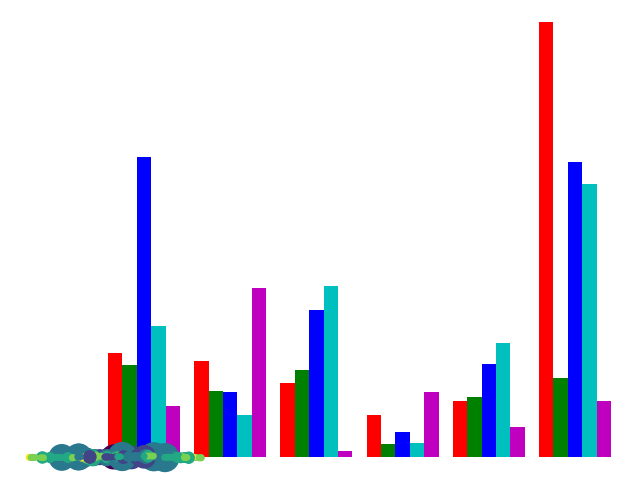


### NetworkX

None


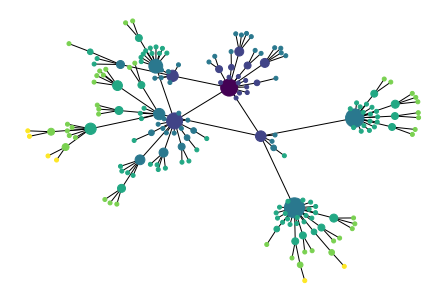

In [89]:
# Using the NetworkX and Matplotlib libraries.

import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn
from networkx.drawing.nx_agraph import graphviz_layout

def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name)
        traverse(graph, start, child)
        
def hyponym_graph(start):
    G = nx.Graph()
    G.depth = {}
    traverse(G, start, start)
    return G

def graph_draw(graph):
    nx.draw(graph,
            node_size = [16 * graph.degree(n) for n in graph],
            node_color = [graph.depth[n] for n in graph],
            with_labels = False)
matplotlib.pyplot.savefig("1.png")

dog = wn.synset('dog.n.01')
graph = hyponym_graph(dog)

print (graph_draw(graph))

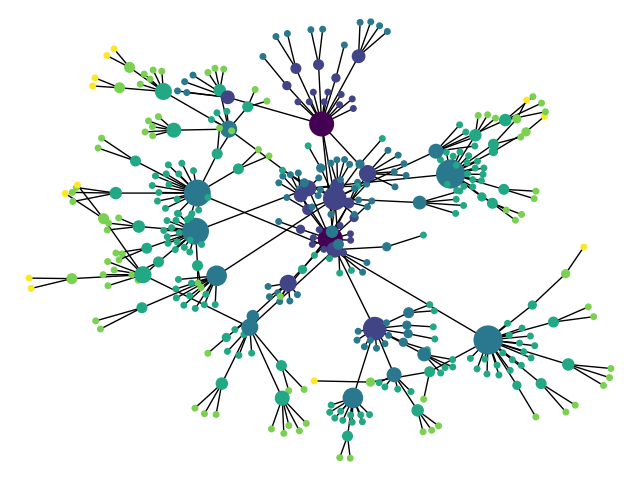

### csv

In [90]:
import csv
input_file = open("lex.csv", "r")
read = csv.reader(input_file)

for row in read:
    print (row)

FileNotFoundError: [Errno 2] No such file or directory: 'lex.csv'

### NumPy

In [91]:
from numpy import array
cube = array([ [[0,0,0], [1,1,1], [2,2,2]],
                [[3,3,3], [4,4,4], [5,5,5]],
                [[6,6,6], [7,7,7], [8,8,8]] ])
print (cube[1,1,1])

print (cube[2].transpose())

print (cube[2,1:])

4
[[6 7 8]
 [6 7 8]
 [6 7 8]]
[[7 7 7]
 [8 8 8]]


In [92]:
from numpy import linalg
a=array([[4,0], [3,-5]])
u,s,vt = linalg.svd(a)

print (u)

print (s)

print (vt)

[[-0.4472136  -0.89442719]
 [-0.89442719  0.4472136 ]]
[6.32455532 3.16227766]
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]
